In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
import plotly.graph_objects as go


In [28]:
data = pd.read_csv('data_phone.csv')
# Xem dữ liệu:
data

,brand,model,OS,internal_memory,RAM,battery_mah,Screen,year,Price
0,Acer,beTouch E110,Android,0.25,0.25,1500.0,2.80,2010,70.0
1,BlackBerry,Bold 9700,BlackBerry,0.25,0.25,1500.0,2.44,2009,90.0
2,BlackBerry,Curve 3G 9300,BlackBerry,0.25,0.25,1150.0,2.46,2010,80.0
3,Dell,XCD28,Android,0.25,0.25,1100.0,2.80,2010,180.0
4,ZTE,Racer,Android,0.25,0.25,1100.0,2.80,2010,180.0
...,...,...,...,...,...,...,...,...,...
3916,Celkon,A79,Android,NaN,NaN,1300.0,3.50,2013,70.0
3917,Celkon,A99+,Android,NaN,NaN,1300.0,4.30,2012,NaN
3918,Celkon,A77,Android,NaN,NaN,1300.0,3.50,2012,50.0
3919,Celkon,A99,Android,NaN,NaN,1200.0,4.00,2012,NaN


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            3921 non-null   object 
 1   model            3921 non-null   object 
 2   OS               3921 non-null   object 
 3   internal_memory  3761 non-null   float64
 4   RAM              3683 non-null   float64
 5   battery_mah      3760 non-null   float64
 6   Screen           3906 non-null   float64
 7   year             3921 non-null   int64  
 8   Price            2848 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 275.8+ KB


Dữ liệu này bao gồm các thuộc tính:
- brand : Hãng điện thoại
- model	: Tên điện thoại
- OS : hệ điều hành
- internal_memory : dung lượng rom
- RAM : dung lượng ram
- battery :	dung lượng pin
- Screen : kích thước điện thoại, tính bằng inches
- year	: năm ra mắt
- Price : giá của điện thoại

In [30]:
# kiểm tra có trùng lặp dữ liệu không?
data.duplicated().sum()

0

In [31]:
data.isnull().sum()

brand                 0
model                 0
OS                    0
internal_memory     160
RAM                 238
battery_mah         161
Screen               15
year                  0
Price              1073
dtype: int64

In [32]:
# xóa dữ liệu rỗng
data = data.dropna(axis=0)

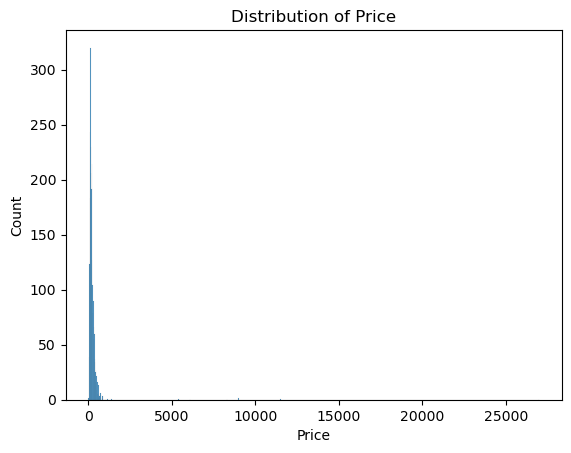

In [33]:
# Kiểm tra sự phân bố của biến Price
sns.histplot(data['Price'])
plt.title('Distribution of Price')
plt.show()

In [34]:
# Xử lý giá trị nhiễu bất thường bằng phương pháp IQR
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.9)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = (data['Price'] < lower_bound) | (data['Price'] > upper_bound)
phone_data = data[~outlier_indices]


In [35]:
phone_data

,brand,model,OS,internal_memory,RAM,battery_mah,Screen,year,Price
0,Acer,beTouch E110,Android,0.25,0.25,1500.0,2.80,2010,70.0
1,BlackBerry,Bold 9700,BlackBerry,0.25,0.25,1500.0,2.44,2009,90.0
2,BlackBerry,Curve 3G 9300,BlackBerry,0.25,0.25,1150.0,2.46,2010,80.0
3,Dell,XCD28,Android,0.25,0.25,1100.0,2.80,2010,180.0
4,ZTE,Racer,Android,0.25,0.25,1100.0,2.80,2010,180.0
...,...,...,...,...,...,...,...,...,...
3749,ZTE,nubia Z17,Android,128.00,6.00,3200.0,5.50,2017,500.0
3750,vivo,Xplay6,Android,128.00,6.00,4080.0,5.46,2016,700.0
3751,vivo,Xplay5 Elite,Android,128.00,6.00,3600.0,5.43,2016,610.0
3752,ZTE,Axon 7s,Android,128.00,6.00,3400.0,5.50,2017,700.0


In [36]:
phone_data = phone_data.drop("model",axis=1)

In [37]:
x = phone_data.drop('Price', axis = 1)
y = phone_data.Price

In [39]:
brands = phone_data['brand'].unique()
os = phone_data['OS'].unique()

In [40]:
cat_features = np.array([i for i in phone_data.columns.tolist() if phone_data[i].dtype == 'object'])
cont_features = np.array([i for i in phone_data.columns.tolist() if phone_data[i].dtype != 'object'])

In [41]:
from sklearn.preprocessing import LabelEncoder
for i in cat_features:
    enc = LabelEncoder()
    x[i] =enc.fit_transform(x[i])


In [42]:
x.head(10)

,brand,OS,internal_memory,RAM,battery_mah,Screen,year
0,0,0,0.25,0.25,1500.0,2.80,2010
1,9,1,0.25,0.25,1500.0,2.44,2009
2,9,1,0.25,0.25,1150.0,2.46,2010
3,14,0,0.25,0.25,1100.0,2.80,2010
4,58,0,0.25,0.25,1100.0,2.80,2010
5,9,1,0.25,0.50,1500.0,2.44,2010
6,30,0,0.25,0.50,1400.0,3.50,2012
9,34,0,0.25,0.50,1200.0,3.50,2012
10,58,0,0.25,0.50,1100.0,2.80,2011
11,12,0,0.25,0.50,1500.0,4.00,2013


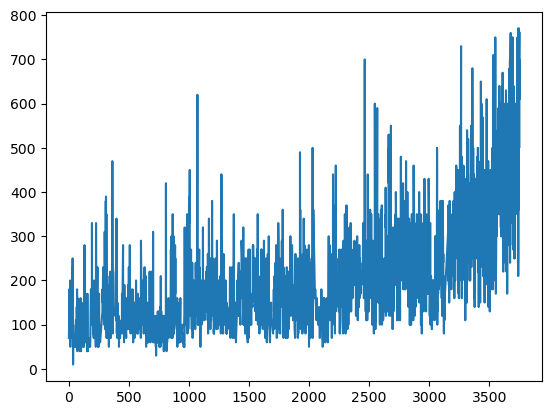

In [43]:
plt.plot(phone_data['Price'])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Độ chính xác của mô hình: 0.551819526371731


<Axes: >

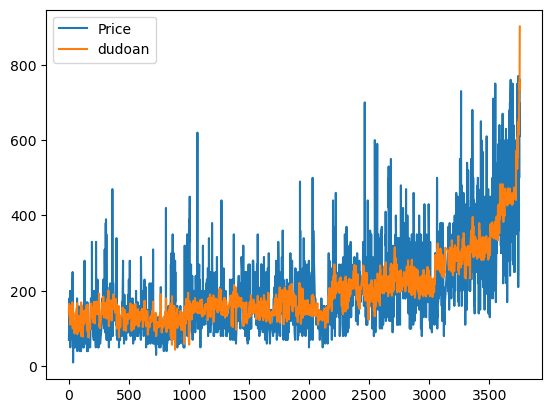

In [46]:
# Xây dựng mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
score = model.score(X_test, y_test)
print('Độ chính xác của mô hình:', score)

with open('phone_train.pkl','wb') as f:
    pickle.dump(model,f)

phone_data['dudoan']=model.predict(x)
phone_data[['Price','dudoan']].plot()


In [47]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Tính MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Tính R2
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

MSE:  6916.085996340748
R2:  0.551819526371731


In [48]:
a=np.sqrt(pow(phone_data['dudoan']-phone_data['Price'],2).mean())
print(a)

80.54446295488398


In [49]:
print(x)

      brand  OS  internal_memory   RAM  battery_mah  Screen  year
0         0   0             0.25  0.25       1500.0    2.80  2010
1         9   1             0.25  0.25       1500.0    2.44  2009
2         9   1             0.25  0.25       1150.0    2.46  2010
3        14   0             0.25  0.25       1100.0    2.80  2010
4        58   0             0.25  0.25       1100.0    2.80  2010
...     ...  ..              ...   ...          ...     ...   ...
3749     58   0           128.00  6.00       3200.0    5.50  2017
3750     61   0           128.00  6.00       4080.0    5.46  2016
3751     61   0           128.00  6.00       3600.0    5.43  2016
3752     58   0           128.00  6.00       3400.0    5.50  2017
3754      3   5           256.00  2.00       1960.0    4.70  2016

[2570 rows x 7 columns]


In [50]:
phone_data

,brand,OS,internal_memory,RAM,battery_mah,Screen,year,Price,dudoan
0,Acer,Android,0.25,0.25,1500.0,2.80,2010,70.0,141.748570
1,BlackBerry,BlackBerry,0.25,0.25,1500.0,2.44,2009,90.0,165.152239
2,BlackBerry,BlackBerry,0.25,0.25,1150.0,2.46,2010,80.0,147.031633
3,Dell,Android,0.25,0.25,1100.0,2.80,2010,180.0,143.474770
4,ZTE,Android,0.25,0.25,1100.0,2.80,2010,180.0,154.001827
...,...,...,...,...,...,...,...,...,...
3749,ZTE,Android,128.00,6.00,3200.0,5.50,2017,500.0,732.997142
3750,vivo,Android,128.00,6.00,4080.0,5.46,2016,700.0,753.915340
3751,vivo,Android,128.00,6.00,3600.0,5.43,2016,610.0,751.860770
3752,ZTE,Android,128.00,6.00,3400.0,5.50,2017,700.0,733.808801


In [1]:
import pickle
def predict_price(brand, OS, internal_memory, RAM, battery_mah, Screen, year):
    with open('phone_train.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    return loaded_model.predict([[brand, OS, internal_memory, RAM, battery_mah, Screen, year]])

brand = input('Hãng điện thoại: ')
OS = input('Hệ điều hành: ')
internal_memory = float(input('Dung lượng trong: '))
RAM = float(input('Dung lượng RAM: '))
battery_mah = float(input('Dung lượng pin: '))
Screen = float(input('Kích thước màn hình: '))
year = int(input('Năm ra mắt: '))

# Chuyển đổi dữ liệu đầu vào thành số
brand = float(brand)
OS = float(OS)

price = predict_price(brand, OS, internal_memory, RAM, battery_mah, Screen, year)
print(f'Giá dự đoán là: {price} EUR')

Giá dự đoán là: [1026.6410825] EUR


c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
